## Média e médiana

In [310]:
from collections import Counter;
from matplotlib import pyplot as plt;

def simple_mean(v):
    return sum(v) / len(v);

def pond_median(v, w):
    sum_vw = [x * y for x,y in zip(v,w)];
    return sum(sum_vw) / sum(v);
    
n_alunos = [4,2,3,3];
notes = [10, 8.5, 6, 5];
    
print('A média ponderada dos alunos é de: ', pond_median(n_alunos, notes));

A média ponderada dos alunos é de:  7.5


## Rol

In [29]:
## Rol é quando ordenamos os dados de um vetor, seja crescente ou decrescente
sorted(n_alunos) 

[2, 3, 3, 4]

Encontre a nota modal e a médiana da tabela abaixo:

| N. Alunos   |      Notas      |
|-------------|:---------------:|
| 4           | 7               |
| 2           | 5               |
| 2           | 6               |
| 1           | 9.5             |

In [124]:
from collections import Counter;

n_alunos = [4,4,2,1,1];
notes = [7,5,6,9.5,6.5];

def get_rol(n_alunos, notes):
    desorganized_notes = [];
    
    for i, value in enumerate(n_alunos):
        j = 0;
        
        while(j < int(value)):
            desorganized_notes.append(notes[i]);
            j = j + 1;
            
    return sorted(desorganized_notes);
            
def median(v):
    num_v = len(v);
    middle_v = num_v // 2;
    
    if num_v % 2 == 1:
        return v[middle_v]
    else:    
        return simple_mean((v[middle_v - 1], v[middle_v]))
    
def get_moda(v):
    count = Counter(v);
    commons = count.most_common();
    num_max = commons[0][1];

    return [value for value, repeated_times in commons
                if repeated_times == num_max];
        
    
rol = get_rol(n_alunos, notes);
md = median(rol);

print('A moda é: ', get_moda(rol));
print('A médiana da nota dos alunos é:', md);

A moda é:  [5, 7]
A médiana da nota dos alunos é: 6.25


## Dispersão

### Amplitude

In [126]:
def data_range(x):
    return max(x) - min(x)

data_range(n_alunos)

3

### Desvio padrão e variância

Calcule o desvio padrão e a variancia destes valores:

[7,5,6,9.5,6.5]

In [ ]:
import math 

def sum_of_square_and_md(v, md):
    return sum([(x - md )** 2 for i,x in enumerate(v)]);

def variance(v):
    md = simple_mean(v);
    n = len(v);
    
    return sum_of_square_and_md(v, md) / (n - 1);

def desvio(v):
    return math.sqrt(variance(v));

def quantile(x, p):
    p_index = int(p*len(x));
    return sorted(x)[p_index];

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25);

def dot(v,w):
    return sum(vi * wi for vi, wi in zip(v, w));

values = [7,5,6,9.5,6.57,5,6,9.5,6.5];

print('variancia: ', variance(values))
print('Desvio padrão: ', desvio(values))
print('Interquantile:', interquartile_range(values));
print('------------------------------------------')
print('Média:', simple_mean(values));

## Probabilidade

calcular a possibilidade de ganhar na megasena

In [236]:
def factorial(value, num):
    total = value;
    
    for x in range(num):
        calc = value - (x + 1)

        if calc:
            total = total * (value - (x + 1))
        
    return total;

## n! / p!*(n-p)!
## onde '!' = fator
## Esta função serve para calcular o numero de combinações possiveis
def calcular_possibilidades_no_espaco_amostral(n, p):
    return factorial(n,p-1) / factorial(p, p)

def change_door_game(v, gold_value):
    choice = {'bad': 0, 'good': 0}
    for i,value in enumerate(v):
        if value != gold_value:
            choice['good'] += 1;
        else:
            choice['bad'] += 1;
        
    choice['bad'] = choice['bad'] / len(v);
    choice['good'] = choice['good'] / len(v);
    
    return choice

print('Trocando as portas, a porcentagem das sua escolha ser ruim ou boa é: ')
print(change_door_game(['car','poop','poop','poop','poop','poop'], 'car'))

Trocando as portas, a porcentagem das sua escolha ser ruim ou boa é: 
{'bad': 0.16666666666666666, 'good': 0.8333333333333334}


## Variáveis aleatórias

Dado 5 caixas, qual a probabilidade de 2 caixas que passam 40% do tempo do dia ocupados, estarem livres quando você for usar?

In [306]:
## Irei usar a formula de 
## P(X=k) = (5*k) * 0.4 elevado a k * 0.6 elevado a k
## onde 0.4 é os 40% do dia ocupado

def binominal_distribuition(k, timer, qtd):
    return calcular_possibilidades_no_espaco_amostral(qtd, k) * (timer ** k) * ((1-timer) ** (qtd - k))

print('Logo a probabilidade é de:', binominal_distribuition(3, 0.4, 5))

Logo a probabilidade é de: 0.23040000000000005


### Linha de produdução de bebidas

- 20% defeitos
- Amostra N = 8
- X = Peças defeituosas
- P(X=2)=?


In [307]:
binominal_distribuition(2,0.2,8)

0.29360128000000013

## Distribuição Normal


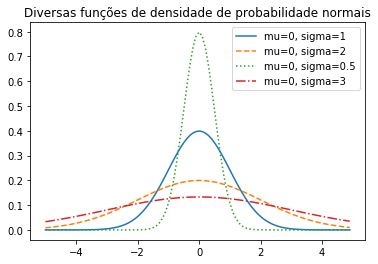

In [370]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi);
    return (math.exp(-(x-mu)**2/2/sigma**2)/(sqrt_two_pi*sigma))

xs = [x/10 for x in range(-50,50)]
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x,sigma=3) for x in xs], '-.', label='mu=0, sigma=3')
plt.legend()
plt.title('Diversas funções de densidade de probabilidade normais');
plt.show()

### Problema

Suponha que você tenha 1 industria que 60% das peças torneadas são polidas. Dada uma amostra com 10 peças torneadas, qual a probabilidade de 8 ou mais, terem sidos polida? Qual a média e a variância desta amostra?

In [362]:
p8 = binominal_distribuition(8, 0.6, 10);
p9 = binominal_distribuition(9, 0.6, 10);
p10 = binominal_distribuition(10, 0.6, 10);

p8_9_10 = p8 + p9 + p10;
mu = 10 * 0.6;
sigma = 10 * 0.6 * (1 - 0.6);

print('A probabilidade é:', p8_9_10);
print('A média é:', mu);
print('A variancia é:', sigma);


A probabilidade é: 0.16728975359999995
A média é: 6.0
A variancia é: 2.4000000000000004


0.14378526851751092

### Distribuição de Poisson

In [ ]:
def poisson(X, delta, t):
    if X:
        fac_x = factorial(X,X);
    else:
        fac_x = factorial(1,1);

    return round(math.exp(-delta*t)*((delta*t)** X) / fac_x, 3)

def getBugsProbabilidade(value):
    return poisson(value, 0.2, 4);

p1 = getBugsProbabilidade(0);
p2 = getBugsProbabilidade(1);
p3 = getBugsProbabilidade(2);
p4 = getBugsProbabilidade(3);

p_four_bugs = 1 - p1 - p2 - p3 - p4;

## preco medio = preço(defeitos=x)*probabilidade(defeitos=x)
md_price = p1 * 50 + p2 * 45 + p3 * 40 + p4 * 35 + p_four_bugs * 30;
print(md_price)

Dado um elevador de 300kg, qual a probabilidade dele parar se tivermos 13 passageiros com a média de 70kg